# Cadena periódica de N osciladores acoplados

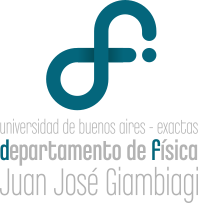  
2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  
----

Bibliografía:  
- Sección 3.1  
  [Ondas](http://bit.ly/F2Depinev02)  
  Ricardo Depine   
  v.5, 2020

# Enunciado
Enlazadas por resortes de coeficiente de dureza $k$ y longitud natural $l_0$ unas $N$ partículas de masa $m$ en reposo están equiespaciadas en $a$.  
![](figuras/ej1-11.png)
1. Escriba la ecuación de movimiento transversal para la partícula enésima usando la aproximación de ángulos pequeños.
2. Proponga una solución de la forma:
	\\[
		\Psi_{n}^{(p)}(t)=A^{(p)}\cos\left(nk^{(p)}a+\alpha^{(p)}\right)\cos\left(\omega^{(p)}t+\phi^{(p)}\right)
	\\]
	Halle la relación de dispersión y grafíquela.
	¿Depende esta relación de las condiciones de contorno?
	¿Cuánto vale la frecuencia más baja?
	¿Qué representa dicho modo? 
1.  En la figura se muestra el caso de extremos fijos en que una virtual partícula $n=0$ estaría en la pared izquierda y una $n= N+1$ en la derecha.
    Obtenga las frecuencias correspondientes a los modos normales de oscilación transversal para este y escriba la solución general para la partícula enésima. 
1. Ídem. anterior, pero con ambos extremos están libres (atención: ¿cómo sería un _extremo libre_ en esta configuración?).
1. (*) Ídem. anterior, pero con el extremo izquierdo libre y el derecho fijo a la pared. 
1. Particularice los resultados de 3, 4 y 5 para el caso en que \(N = 3\).

# Resolución

## Ecuaciones de movimiento

Excepto las partículas en la extrema izquierda y derecha de la cadena, \\(n=1\\) y \\(n=N\\), todas las fuerzas que actuan son producto del potencial

In [2]:
import sympy as sym
from sympy.physics.mechanics import init_vprinting
init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración

In [16]:
t = sym.Symbol('t')
k= sym.Symbol('k', positive=True) # parámetros físicos

psi_nMinus = sym.Function('\Psi_{n-1}')(t)
psi_n = sym.Function('\Psi_{n}')(t)
psi_nPlus = sym.Function('\Psi_{n+1}')(t)

V = sym.Eq(sym.Function('V')(psi_nMinus, psi_n, psi_nPlus),
           k/2* ( (psi_nPlus- psi_n)**2 + (psi_n- psi_nMinus)**2 ) 
          )
V

Entonces las fuerzas sobre la enésima partícula es

In [22]:
m = sym.Symbol('m', positive=True) # parámetros físicos
sym.Eq(m* psi_n.diff(t,2),  V.rhs.diff(psi_n) ) 

In [23]:
newton_n = sym.Eq(m* psi_n.diff(t,2),  V.rhs.diff(psi_n).simplify() ) 
newton_n

## Modos normales

Sabemos que teniendo \\(n\\) partículas tendremos sendos modos normales con distintas frencuencias \\(\omega\\).
Sería una solución para el modo \\(p\\) entre los \\(n\\) posibles

In [34]:
A_p_n  = sym.Symbol('A_n^{(p)}')
omega_p = sym.Symbol('\omega^{(p)}')
phi_p = sym.Symbol('\phi^{(p)}')
psi_p_n = sym.Eq(sym.Symbol('\Psi_n^{(p)}'), A_p_n* sym.cos(omega_p * t + phi_p ) )
psi_p_n

donde \\(A_n^{(p)}\\) es la amplitud para párticula \\(n\\) en ese modo.
Ídem. para las partículas vecinas \\(n-1\\) y \\(n+1\\).

In [37]:
A_p_nMinus, A_p_nPlus  = sym.symbols('A_{n-1}^{(p)}, A_{n+1}^{(p)}')
psi_p_nPlus = sym.Eq(sym.Symbol('\Psi_{n+1}^{(p)}'), A_p_nPlus* sym.cos(omega_p * t + phi_p ) )
psi_p_nMinus = sym.Eq(sym.Symbol('\Psi_{n-1}^{(p)}'), A_p_nMinus* sym.cos(omega_p * t + phi_p ) )
psi_p_nPlus, psi_p_nMinus

Se substituyen estas tres soluciones en la ecuación de la dinámica para la partícula \\(n\\).

### Relación de dispersión